In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, GlobalAveragePooling1D, Activation, GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

In [ ]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')
!ls "/content/drive/My Drive"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 Barcelona	       Europass				     NN
'challenge 2.avi'     'Foglio di lavoro senza nome.gsheet'   ROC.gsheet
'Colab Notebooks'     'forces in fluids.gsheet'		     USB
'cours physique.zip'   kreisel.gsheet
 elasticity.gsheet    'Magn hysteresis.gsheet'


In [ ]:
x = np.load("/content/drive/My Drive/NN/data/training_data.npy").astype(np.float32)
#x_1 = np.load("/content/drive/My Drive/NN/data/testing_data.npy").astype(np.float32)

n_samples = x.shape[1]
n_channels = x.shape[2]
n_classes = 2

#x_train = np.reshape(x, (x.shape[0], -1))  #for fc network: shape is (150000, 256)
x_train = np.expand_dims(x, axis=-1) #for cnn network


In [ ]:
# define labels with one hot encoding, (1,0) -> noise, (0,1) -> signal
y_train = np.zeros((x.shape[0], 2))
y_train[:75000, 1] = 1
y_train[75000:, 0] = 1


In [ ]:
BATCH_SIZE = 32
EPOCHS = 20
callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=1)]

In [ ]:
"""#Fully connected network
FC_big  = keras.Sequential(
    [
        Dense(300, activation="relu", name="layer1", input_dim=x_train.shape[-1]),
        Dense(350, activation="relu", name="layer2"),
        Dense(400, activation="relu", name="layer3"),
        Dense(400, activation="relu", name="layer4"),
        Dense(400, activation="relu", name="layer5"),
        Dense(350, activation="relu", name="layer6"),
        Dense(200, activation="relu", name="layer7"),
        Dense(n_classes, activation="softmax", name="layer8"),
    ]
)"""

'#Fully connected network\nFC_big  = keras.Sequential(\n    [\n        Dense(300, activation="relu", name="layer1", input_dim=x_train.shape[-1]),\n        Dense(350, activation="relu", name="layer2"),\n        Dense(400, activation="relu", name="layer3"),\n        Dense(400, activation="relu", name="layer4"),\n        Dense(400, activation="relu", name="layer5"),\n        Dense(350, activation="relu", name="layer6"),\n        Dense(200, activation="relu", name="layer7"),\n        Dense(n_classes, activation="softmax", name="layer8"),\n    ]\n)'

In [ ]:
"""#1D - Convolutional Network
model_conv2D_big = Sequential(
    [
        Conv2D(50, (50,1), activation='relu', input_shape=(n_samples, n_channels, 1)), # n_filters, n_width
        Conv2D(75, (50,1), activation='relu'), # n_filters, n_width
        Conv2D(100, (50,1), activation='relu'),
        Conv2D(50, (50,1), activation='relu'),
        #Conv1D(50, 50, activation='relu'),
        Dropout(0.5),
        #MaxPooling1D(pool_size=(2)),
        Flatten(),
        #Dense(200, activation="relu"),
        #Dense(50, activation="relu"),
        Dense(n_classes, activation='softmax')
    ]
)"""

'#1D - Convolutional Network\nmodel_conv2D_big = Sequential(\n    [\n        Conv2D(50, (50,1), activation=\'relu\', input_shape=(n_samples, n_channels, 1)), # n_filters, n_width\n        Conv2D(75, (50,1), activation=\'relu\'), # n_filters, n_width\n        Conv2D(100, (50,1), activation=\'relu\'),\n        Conv2D(50, (50,1), activation=\'relu\'),\n        #Conv1D(50, 50, activation=\'relu\'),\n        Dropout(0.5),\n        #MaxPooling1D(pool_size=(2)),\n        Flatten(),\n        #Dense(200, activation="relu"),\n        #Dense(50, activation="relu"),\n        Dense(n_classes, activation=\'softmax\')\n    ]\n)'

In [ ]:
models_cnn = ['model_conv1D_2l_20_10']

#2D - Convolutional Network
model_conv2D_2l_10_20 = Sequential(
    [
        Conv2D(10, (20,1), activation='relu', name="layer1", input_shape=(n_samples, n_channels,1)), # n_filters, n_width
        Conv2D(10, (20,1), activation='relu', name="layere2"), # n_filters, n_width
        Dropout(0.5, name="layer3"),
     #   #MaxPooling2D(pool_size=(5, 1), name="pooling"),
        Flatten(name="layer4"),
        Dense(n_classes, activation='softmax', name="layer5")
    ]
)

"""
model_name = 'model_conv2D_2l_20_10'
model_conv2D = Sequential()
model_conv2D.add(Conv2D(20, (10, 1), activation='relu', input_shape=(n_samples, n_channels, 1)))  # n_filters, n_width
model_conv2D.add(Conv2D(20, (10, 1), activation='relu'))
model_conv2D.add(Dropout(0.5))
#model_conv2D.add(MaxPooling1D(pool_size=5))
model_conv2D.add(Reshape((np.prod(model_conv2D.layers[-1].output_shape[1:]),)))  # equivalent to Flatten
model_conv2D.add(Dense(n_classes, activation='softmax'))"""


"\nmodel_name = 'model_conv2D_2l_20_10'\nmodel_conv2D = Sequential()\nmodel_conv2D.add(Conv2D(20, (10, 1), activation='relu', input_shape=(n_samples, n_channels, 1)))  # n_filters, n_width\nmodel_conv2D.add(Conv2D(20, (10, 1), activation='relu'))\nmodel_conv2D.add(Dropout(0.5))\n#model_conv2D.add(MaxPooling1D(pool_size=5))\nmodel_conv2D.add(Reshape((np.prod(model_conv2D.layers[-1].output_shape[1:]),)))  # equivalent to Flatten\nmodel_conv2D.add(Dense(n_classes, activation='softmax'))"

In [ ]:
print(x_train.shape)

(150000, 256, 1, 1)


model_conv2D_2l_10_20
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Conv2D)              (None, 237, 1, 10)        210       
_________________________________________________________________
layere2 (Conv2D)             (None, 218, 1, 10)        2010      
_________________________________________________________________
layer3 (Dropout)             (None, 218, 1, 10)        0         
_________________________________________________________________
layer4 (Flatten)             (None, 2180)              0         
_________________________________________________________________
layer5 (Dense)               (None, 2)                 4362      
Total params: 6,582
Trainable params: 6,582
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
3750/3750 [==============================] - 79s 21ms/step - loss: 0.0287 - accura

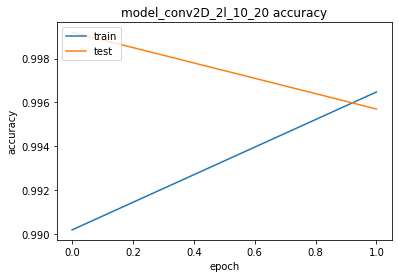

In [ ]:
model = model_conv2D_2l_10_20
model_name = 'model_conv2D_2l_10_20'

# train the network
model.compile(optimizer='Adam',
          loss='binary_crossentropy',
          metrics=['accuracy'])

print(model_name)
print(model.summary())

history = model.fit(x_train,y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          callbacks=callbacks_list,
          validation_split=0.2,
          verbose=1)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title(model_name + ' accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

model.save(f'/content/drive/My Drive/NN/train_all/'+model_name+'.h5')

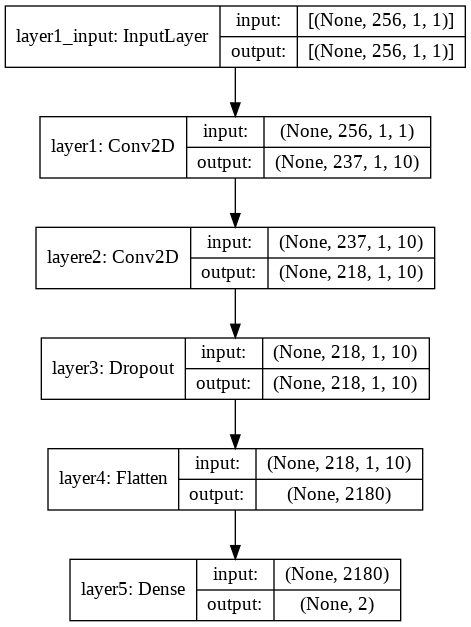

In [ ]:
models_cnn = ['model_conv1D_1l_5_5', 'model_conv1D_1l_10_5', 'model_conv1D_1l_15_5', 'model_conv1D_2l_10_5', 'model_conv1D_2l_15_5', 'model_conv1D_2l_5_10', 'model_conv1D_1l_15_10', 'model_conv1D_2l_10_10', 'model_conv1D_2l_20_10']

#for i in range(len(models_cnn)):
  #model = keras.models.load_model(f'/content/drive/My Drive/NN/train_all/{models_cnn[i]}.h5', compile=False)
keras.utils.plot_model(model, show_shapes=True)#, to_file=f"{models_cnn[i]}_structure.png", show_shapes=True, dpi=125)
#  files.download(f"{models_cnn[i]}_structure.png")
